In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def MyDBSCAN(Dataset, epsilon, Min_no_of_Pts):#function to create separate clusters as well as to identify core,border and noise points 
    labels = [0]*len(Dataset)#initially labels for all points are taken to be 0 
    Cluster_ID = 0#cluster ID
    i=-1
    while i!=len(Dataset)-1:
        i += 1
        if not (labels[i] == 0):#condition for un-visited
           continue
        
        # Find all of Point's neighboring points.
        NeighborPts = region_Query(Dataset,i, epsilon)
        if len(NeighborPts) < Min_no_of_Pts:
            labels[i] = -1#noise point
        else: 
            Cluster_ID+=1#increment of cluster_ID by 1
            form_cluster(Dataset, labels,i, NeighborPts, Cluster_ID, epsilon, Min_no_of_Pts)#growing the present cluster so as to check its neighbours
    # After all data has been clustered! we return the final labels
    return (labels,Cluster_ID)

In [3]:
def region_Query(Dataset, P, epsilon):# function to find whether neighbour points includes or not in the given cluster
    nearest_neighbour = []
    # For each point in the dataset...
    Point=-1
    while Point!=len(Dataset)-1:
        Point+=1
        # If the distance is below the threshold, add it to the neighbors list.
        if np.linalg.norm(Dataset[P] - Dataset[Point]) <= epsilon:
           nearest_neighbour.append(Point)
    return nearest_neighbour

In [4]:
def form_cluster(Dataset, labels, Point, NeighborPts, Cluster_ID, epsilon, MinPts):
   
    labels[Point] = Cluster_ID
    i = 0
    while i < len(NeighborPts):    
        
        # Get the next point from the queue.        
        Pn = NeighborPts[i]
        # Otherwise, if Pn isn't already claimed, claim it as part of C.
        if labels[Pn] == 0:#if it is un-visited 
            labels[Pn] = Cluster_ID# Add Pn to cluster with 'Cluster_ID' (Assign cluster label Cluster_ID).
            
            # Find all the neighbors of Pn
            PnNeighborPts = region_Query(Dataset, Pn, epsilon)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts = NeighborPts + PnNeighborPts
        elif labels[Pn] == -1:#if it is initially a noise point it gets converted to the cluster point
           labels[Pn] = Cluster_ID    
        i += 1        

In [5]:
from itertools import cycle, islice
# from itertools import cycle, islice
def visualize(dataset, cluster, numberOfClusters):
        N = len(dataset)
        colors = np.array(list(islice(cycle(['#98F5FF', '#B23AEE','#3776ab','#CD1076','#FCE6C9','#030303']), 6)))

        for i in range(numberOfClusters):
            x, y = [], []
            for j in range(N):
                if cluster[j] == i+1:
                    x.append(dataset[j, 0])
                    y.append(dataset[j, 1])
            if (i == 0):
                # Plot all outliers point as black
                color = '#CD3333'
            else:
                color = colors[i % len(colors)]

            plt.scatter(x, y, c=color, alpha=1, marker='.')
        plt.show()

In [6]:
#storing the input coordiantes into 2 lists of pbX and pby
pbX = []
pby = []
with open('dataset1.txt') as f:
     for line in f:
         x, y = line.split()
         pbX.append(x)
         pby.append(y)

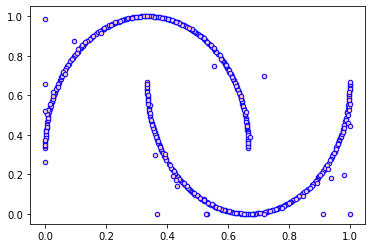

In [7]:
#converting the string to float in input variables and plotting the data
for i in range(len(pbX)):
     pbX[i]=float(pbX[i])
     pby[i]=float(pby[i])
for i in range(len(pbX)):
     pbX[i] = (pbX[i] - min(pbX))/(max(pbX) - min(pbX))
     pby[i] = (pby[i] - min(pby))/(max(pby) - min(pby))
plt.scatter(pbX,pby,c ="pink", 
            linewidths = 1,  
            edgecolor ="blue", 
            s = 20)
plt.show()

In [8]:
#combining both the coordinates into a 2d array
pbZ=np.array(list(zip(pbX,pby)))

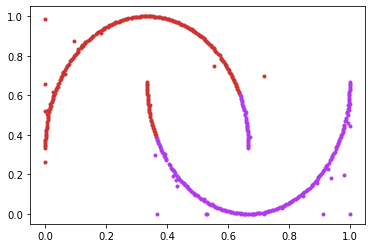

In [9]:
#K-means inbuilt from sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(pbZ)
kmeans.labels_+=1
visualize(pbZ,kmeans.labels_,2)

2


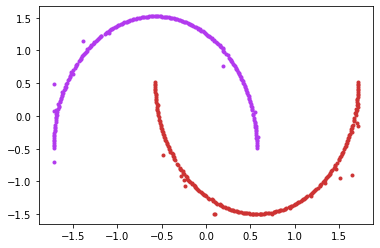

In [10]:
from sklearn.preprocessing import StandardScaler
pbZ = StandardScaler().fit_transform(pbZ)
# My implementation of DBSCAN
my_labels,no_of_clusters = MyDBSCAN(pbZ, epsilon=0.3, Min_no_of_Pts=10)
print(no_of_clusters)
visualize(pbZ,my_labels,no_of_clusters)

In [11]:
# Scikit-learn implementation of DBSCAN
from sklearn.cluster import DBSCAN
print('Runing scikit-learn implementation...')
db = DBSCAN(eps=0.3, min_samples=10).fit(pbZ)
skl_labels = db.labels_

# Scikit learn uses -1 to for NOISE, and starts cluster labeling at 0. I start
# numbering at 1, so increment the skl cluster numbers by 1.
for i in range(0, len(skl_labels)):
    if not skl_labels[i] == -1:
        skl_labels[i] += 1

unequal = 0

# Go through each label and make sure they match (print the labels if they 
# don't)
for i in range(0, len(skl_labels)):
    if  not skl_labels[i] == my_labels[i]:
        print('Scikit learn:', skl_labels[i], 'mine:', my_labels[i])
        unequal += 1

if unequal != 0:
    print ('WRONG -',unequal, 'labels don\'t match.')
else:
     print('PASSED - All labels match!')
    

Runing scikit-learn implementation...
PASSED - All labels match!
